In [15]:
import numpy as np
from data_prep import features, targets, features_test, targets_test

np.random.seed(21)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 2  # number of hidden units
epochs = 900
learnrate = 0.005
errors = []

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)

        output = sigmoid(np.dot(hidden_output,
                                weights_hidden_output))

        ## Backward pass ##
        # TODO: Calculate the network's prediction error
        error = y - output

        # TODO: Calculate error term for the output unit
        output_error_term = error * output * (1 - output)

        ## propagate errors to hidden layer

        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = np.dot(output_error_term, weights_hidden_output)

        # TODO: Calculate the error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1 - hidden_output)

        # TODO: Update the change in weights
        del_w_hidden_output += output_error_term * hidden_output
        del_w_input_hidden += hidden_error_term * x[:, None]

    # TODO: Update weights
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)
        errors.append(loss)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss




Train loss:  0.25135725242598617
Train loss:  0.24996540718842886
Train loss:  0.24862005218904654
Train loss:  0.24731993217179746
Train loss:  0.24606380465584848
Train loss:  0.24485044179257162
Train loss:  0.2436786320186832
Train loss:  0.24254718151769536
Train loss:  0.24145491550165465
Train loss:  0.24040067932493367


Prediction accuracy: 0.725


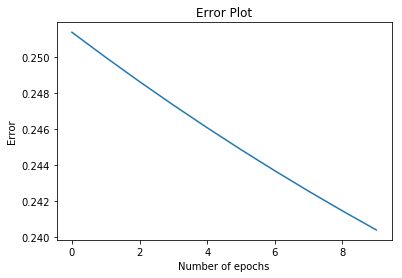

In [16]:
# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

# Plotting the error
import matplotlib.pyplot as plt
plt.title("Error Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.plot(errors)
plt.show()